<h1><center>Navid Bahadoran</center></h1>
<h2><center>Homework1</center></h2>

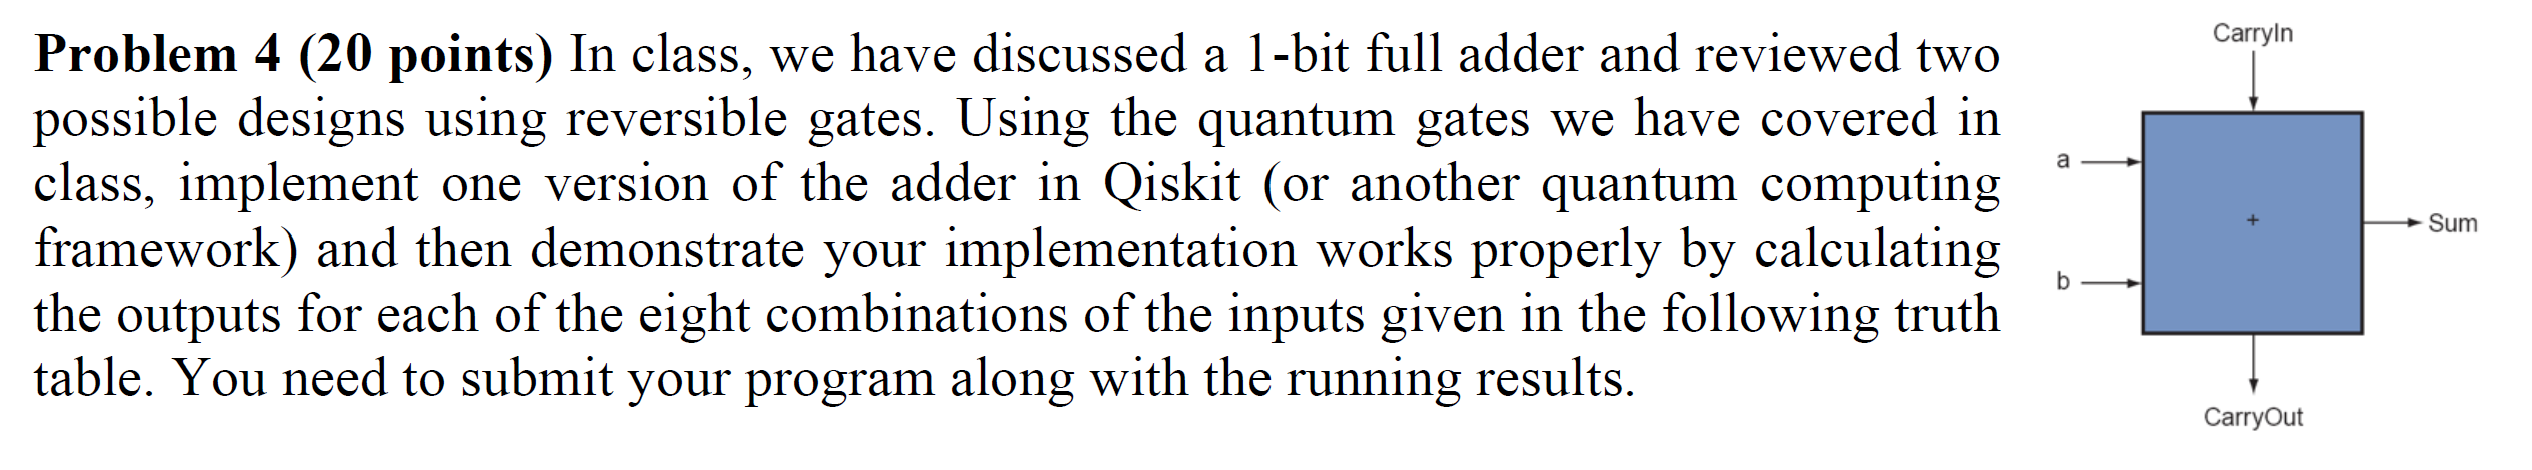

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Create a quantum circuit with 5 qubits and 2 classical bits
def create_full_adder_circuit(a, b, cin):
    qc = QuantumCircuit(5, 2)
    # in qiskit the qubits are initially set |0>, so to make it |1> we should flip it by X gate
    if a:
        qc.x(0)
    if b:
        qc.x(1)
    if cin:
        qc.x(2)
    qc.barrier()
    # CCNOT(Toffoli) gates for calculating the carry bits
    qc.ccx(0, 1, 4)  # Carry from a and b
    qc.ccx(0, 2, 4)  # Carry from a and cin
    qc.ccx(1, 2, 4)  # Carry from b and cin

    qc.barrier()
    # CNOT gates for calculating the sum bit
    qc.cx(0, 3)
    qc.cx(1, 3)
    qc.cx(2, 3)

    qc.barrier()
    # Measure the qubits
    qc.measure(3, 0)  # Sum bit (measured from qubit 2)
    qc.measure(4, 1)  # Carry bit (measured from qubit 3)
    
    # Draw the circuit
    return qc

In [3]:
input_combinations = [
    (0, 0, 0),
    (0, 0, 1),
    (0, 1, 0),
    (0, 1, 1),
    (1, 0, 0),
    (1, 0, 1),
    (1, 1, 0),
    (1, 1, 1)
]

# Use Aer's AerSimulator
simulator = AerSimulator()
a_list, b_list, cin_list, sum_list, cout_list =[],[],[],[],[]
for a, b, cin in input_combinations:
    # Create the full adder circuit for the given inputs
    a_list.append(a)
    b_list.append(b)
    cin_list.append(cin)
    
    qc = create_full_adder_circuit(a, b, cin)

    # Transpile the circuit for the simulator
    compiled_circuit = transpile(qc, simulator)

    # Run the circuit on the simulator
    result = simulator.run(compiled_circuit, shots=1024).result()

    # Get the results
    counts = result.get_counts(qc)
    res=list(counts.keys())[0]
    sum_list.append(res[1])
    cout_list.append(res[0])

In [4]:
table=pd.DataFrame({'a':a_list,'b':b_list,'carryIn':cin_list,'CarryOut':cout_list,'sum':sum_list})


In [5]:
from IPython.display import HTML,display
HTML(table.to_html(index=False))

a,b,carryIn,CarryOut,sum
0,0,0,0,0
0,0,1,0,1
0,1,0,0,1
0,1,1,1,0
1,0,0,0,1
1,0,1,1,0
1,1,0,1,0
1,1,1,1,1


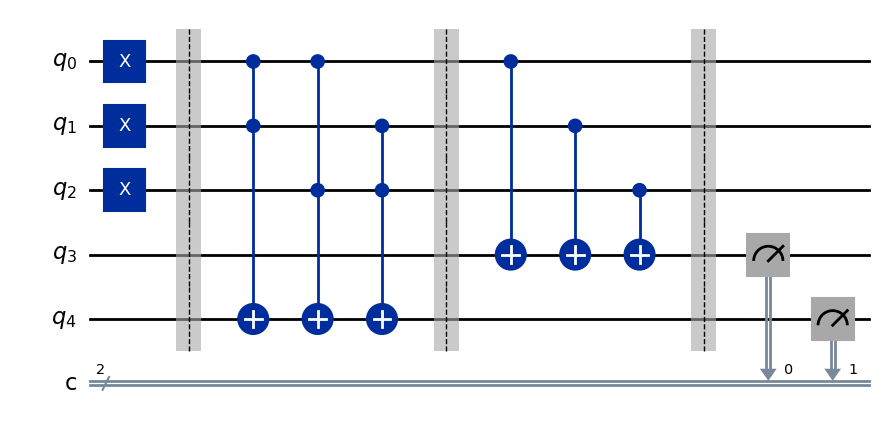

In [6]:
qc.draw(output='mpl')